In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras import optimizers
from keras.layers.advanced_activations import PReLU
from keras.layers.advanced_activations import LeakyReLU
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from pandas import DataFrame
from pandas import concat
from numpy import concatenate
from keras.regularizers import l2
from keras.layers import Activation
from sklearn import metrics
from sklearn.metrics import r2_score
from keras.layers import Dropout
from keras.models import Sequential
from keras.layers import Dense
from keras.models import load_model
from sklearn.utils import shuffle 
from tensorflow.python.keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard, ReduceLROnPlateau

Using TensorFlow backend.


In [2]:
df = pd.read_csv("airquality.csv",encoding='utf-8')
df

/home/gh555657/.local/lib/python3.5/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (7,9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,SiteName,Country,AQI,Pollutant,Status,SO2,CO,CO_8hr,O3,...,PM10,PM25,NO2,NOx,NO,WindSpeed,WindDirec,PublishTime,PM10_AVG,PM25_AVG
0,1,二林,彰化縣,88.0,細懸浮微粒,普通,4.2,0.3,0.3,46,...,103.0,37.0,8.4,9.7,1.4,2.3,293.0,2017/1/7 13:00,81.0,31.0
1,2,三重,新北市,52.0,懸浮微粒,普通,5.7,1.98,1.8,-,...,79.0,18.0,50.0,125.0,75.0,NaN,NaN,2017/1/7 13:00,56.0,14.0
2,3,三義,苗栗縣,78.0,細懸浮微粒,普通,3.3,0.32,0.4,34,...,64.0,36.0,11.0,16.0,4.8,3.3,193.0,2017/1/7 13:00,53.0,26.0
3,4,土城,新北市,81.0,細懸浮微粒,普通,3.7,0.46,0.7,51,...,60.0,42.0,17.0,21.0,4.0,2.0,201.0,2017/1/7 13:00,44.0,28.0
4,5,士林,臺北市,40.0,NaN,良好,3.7,0.43,0.4,45,...,25.0,22.0,16.0,20.0,4.2,1.8,289.0,2017/1/7 13:00,20.0,12.0
5,6,大同,臺北市,43.0,NaN,良好,3.6,1.23,1.3,-,...,55.0,23.0,37.0,55.0,18.0,NaN,NaN,2017/1/7 13:00,37.0,13.0
6,8,大園,桃園市,68.0,細懸浮微粒,普通,9.6,0.38,0.5,30,...,54.0,23.0,21.0,24.0,3.6,2.0,295.0,2017/1/7 13:00,59.0,23.0
7,9,大寮,高雄市,134.0,細懸浮微粒,對敏感族群不良,7.4,0.37,0.5,43,...,47.0,26.0,21.0,26.0,5.6,2.6,287.0,2017/1/7 13:00,83.0,48.0
8,10,小港,高雄市,154.0,細懸浮微粒,對所有族群不良,18.0,0.42,0.6,33,...,69.0,52.0,40.0,49.0,9.0,2.6,273.0,2017/1/7 13:00,92.0,61.0
9,11,中山,臺北市,50.0,NaN,良好,3.8,0.89,0.8,34,...,42.0,23.0,34.0,46.0,12.0,1.6,5.7,2017/1/7 13:00,26.0,15.0


In [3]:
Dalitc = df['SiteName'].isin(['大里交通測站']) #找大里交通測站
df[Dalitc]

,id,SiteName,Country,AQI,Pollutant,Status,SO2,CO,CO_8hr,O3,...,PM10,PM25,NO2,NOx,NO,WindSpeed,WindDirec,PublishTime,PM10_AVG,PM25_AVG
460264,461559,大里交通測站,臺中市,61.0,細懸浮微粒,普通,1.3,1.03,NaN,2.2,...,34.0,17.0,22.2,NaN,NaN,NaN,NaN,2017/10/12 22:00,NaN,NaN
460351,461646,大里交通測站,臺中市,54.0,細懸浮微粒,普通,1.6,1.02,NaN,1.9,...,35.0,14.0,20.4,NaN,NaN,NaN,NaN,2017/10/12 23:00,NaN,NaN
460436,461731,大里交通測站,臺中市,54.0,細懸浮微粒,普通,1.0,0.88,NaN,3.4,...,28.0,14.0,17.8,NaN,NaN,NaN,NaN,2017/10/13 00:00,NaN,NaN
460460,461755,大里交通測站,臺中市,63.0,細懸浮微粒,普通,1.8,0.87,NaN,2,...,44.0,18.0,18.8,NaN,NaN,NaN,NaN,2017/10/13 01:00,NaN,NaN
460550,461845,大里交通測站,臺中市,58.0,細懸浮微粒,普通,1.6,0.87,NaN,1.8,...,39.0,16.0,18.6,NaN,NaN,NaN,NaN,2017/10/13 02:00,NaN,NaN
460709,462004,大里交通測站,臺中市,58.0,細懸浮微粒,普通,1.6,0,NaN,2.7,...,34.0,16.0,15.6,NaN,NaN,NaN,NaN,2017/10/13 03:00,NaN,NaN
460796,462091,大里交通測站,臺中市,65.0,細懸浮微粒,普通,0.0,0.85,NaN,2.2,...,42.0,19.0,15.2,NaN,NaN,NaN,NaN,2017/10/13 04:00,NaN,NaN
461120,462415,大里交通測站,臺中市,63.0,細懸浮微粒,普通,2.2,0.76,NaN,12.7,...,29.0,18.0,16.9,NaN,NaN,NaN,NaN,2017/10/13 08:00,NaN,NaN
461209,462504,大里交通測站,臺中市,63.0,細懸浮微粒,普通,2.1,0.66,NaN,16.7,...,32.0,18.0,17.8,NaN,NaN,NaN,NaN,2017/10/13 09:00,NaN,NaN
461294,462589,大里交通測站,臺中市,50.0,細懸浮微粒,良好,2.1,0.54,NaN,22.5,...,29.0,12.0,16.4,NaN,NaN,NaN,NaN,2017/10/13 10:00,NaN,NaN


In [4]:
Dalitc = df['SiteName'].isin(['大里交通測站']) #找大里交通測站
Dalitc=df[Dalitc].fillna(method='ffill').drop(columns=['SiteName','AQI','id','Country','Pollutant','Status','CO_8hr','O3_8hr','NOx','WindSpeed','WindDirec','PublishTime','PM10_AVG','PM25_AVG','NO']).reset_index(drop=True)
#只留下SiteName PM25 column


Dalitc

,SO2,CO,O3,PM10,PM25,NO2
0,1.3,1.03,2.2,34.0,17.0,22.2
1,1.6,1.02,1.9,35.0,14.0,20.4
2,1.0,0.88,3.4,28.0,14.0,17.8
3,1.8,0.87,2,44.0,18.0,18.8
4,1.6,0.87,1.8,39.0,16.0,18.6
5,1.6,0,2.7,34.0,16.0,15.6
6,0.0,0.85,2.2,42.0,19.0,15.2
7,2.2,0.76,12.7,29.0,18.0,16.9
8,2.1,0.66,16.7,32.0,18.0,17.8
9,2.1,0.54,22.5,29.0,12.0,16.4


In [5]:
cd4 = Dalitc['PM25']>100
Dalitc[cd4] #輸出整筆資料

,SO2,CO,O3,PM10,PM25,NO2
1568,2.1,1.1,15,134.0,101.0,24.6
1569,3.3,1.07,29,132.0,102.0,25.8
1570,3.6,0.84,43,111.0,102.0,24.8
1799,4.0,1.55,2,155.0,106.0,28.7
1800,4.8,2.43,3,155.0,102.0,27.7
1801,5.8,2.42,3,164.0,102.0,29.0
1802,10.0,2.05,4,184.0,125.0,37.9
1803,7.4,1.63,7,192.0,125.0,50.6
1804,6.7,0.99,22,182.0,121.0,45.9
1862,1.3,0.92,1,23.0,824.0,24.7


In [6]:
Dalitc.replace({0:np.nan,0.0:np.nan}, inplace=True) #將0全部改為空值
Dalitc.replace({985:np.nan,985.0:np.nan}, inplace=True) 
Dalitc.replace({824:np.nan,824.0:np.nan}, inplace=True) 
Dalitc

,SO2,CO,O3,PM10,PM25,NO2
0,1.3,1.03,2.2,34.0,17.0,22.2
1,1.6,1.02,1.9,35.0,14.0,20.4
2,1.0,0.88,3.4,28.0,14.0,17.8
3,1.8,0.87,2.0,44.0,18.0,18.8
4,1.6,0.87,1.8,39.0,16.0,18.6
5,1.6,NaN,2.7,34.0,16.0,15.6
6,NaN,0.85,2.2,42.0,19.0,15.2
7,2.2,0.76,12.7,29.0,18.0,16.9
8,2.1,0.66,16.7,32.0,18.0,17.8
9,2.1,0.54,22.5,29.0,12.0,16.4


In [7]:
Dalitc.fillna(method='ffill', inplace=True) #以前面數字來取代0值


Dalitc

,SO2,CO,O3,PM10,PM25,NO2
0,1.3,1.03,2.2,34.0,17.0,22.2
1,1.6,1.02,1.9,35.0,14.0,20.4
2,1.0,0.88,3.4,28.0,14.0,17.8
3,1.8,0.87,2.0,44.0,18.0,18.8
4,1.6,0.87,1.8,39.0,16.0,18.6
5,1.6,0.87,2.7,34.0,16.0,15.6
6,1.6,0.85,2.2,42.0,19.0,15.2
7,2.2,0.76,12.7,29.0,18.0,16.9
8,2.1,0.66,16.7,32.0,18.0,17.8
9,2.1,0.54,22.5,29.0,12.0,16.4


In [8]:
cd4 = Dalitc['PM25'].isin([0])

Dalitc[cd4] #輸出整筆資料

,SO2,CO,O3,PM10,PM25,NO2


In [9]:
Dalitc['pr']=''
Dalitc.drop([ 0,1,6664,6665],inplace=True)
Dalitc.reset_index(drop=True,inplace=True)


Dalitc.to_csv('Dalitcpollution.csv')

Dalitc

,SO2,CO,O3,PM10,PM25,NO2,pr
0,1.0,0.88,3.4,28.0,14.0,17.8,
1,1.8,0.87,2.0,44.0,18.0,18.8,
2,1.6,0.87,1.8,39.0,16.0,18.6,
3,1.6,0.87,2.7,34.0,16.0,15.6,
4,1.6,0.85,2.2,42.0,19.0,15.2,
5,2.2,0.76,12.7,29.0,18.0,16.9,
6,2.1,0.66,16.7,32.0,18.0,17.8,
7,2.1,0.54,22.5,29.0,12.0,16.4,
8,2.1,0.58,31.1,26.0,7.0,13.6,
9,2.2,0.62,36.0,38.0,15.0,14.5,


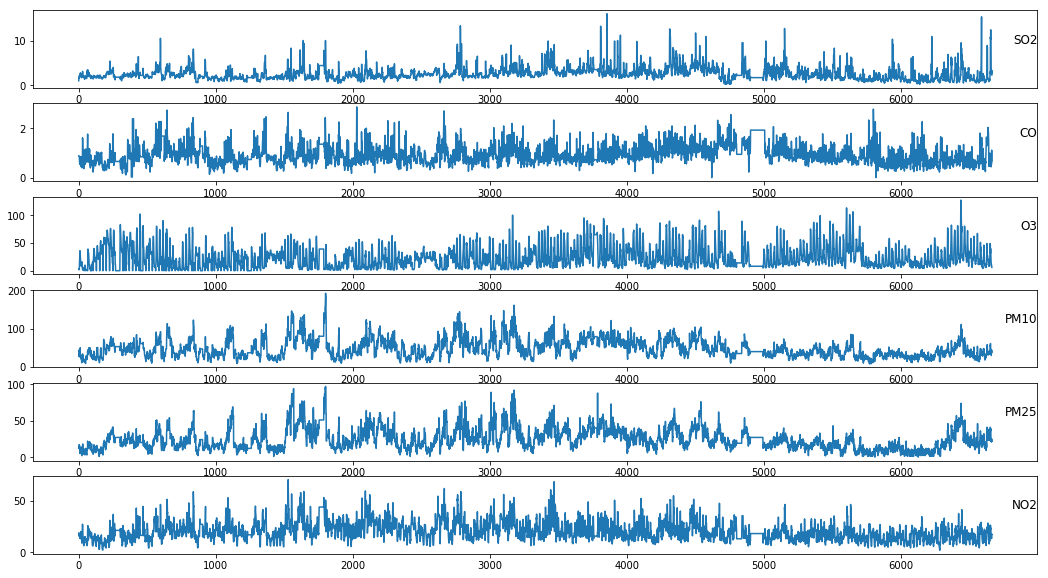

In [10]:
# load dataset
dataset =pd.read_csv('Dalitcpollution.csv',header=0,index_col=0)
values = dataset.values
# integer encode direction
encoder = LabelEncoder()
values[:,4] = encoder.fit_transform(values[:,4])
# ensure all data is float
values = values.astype('float32')
# specify columns to plot
groups = [0, 1,2, 3, 4,5]
i=1
plt.figure(figsize=(18,10)) 
for group in groups:
	plt.subplot(len(groups), 1, i)
	plt.plot(values[:, group])
	plt.title(dataset.columns[group], y=0.5, loc='right')
	i += 1
plt.show()

In [11]:
dataset

,SO2,CO,O3,PM10,PM25,NO2,pr
0,1.0,0.88,3.4,28.0,12.0,17.8,NaN
1,1.8,0.87,2.0,44.0,16.0,18.8,NaN
2,1.6,0.87,1.8,39.0,14.0,18.6,NaN
3,1.6,0.87,2.7,34.0,14.0,15.6,NaN
4,1.6,0.85,2.2,42.0,17.0,15.2,NaN
5,2.2,0.76,12.7,29.0,16.0,16.9,NaN
6,2.1,0.66,16.7,32.0,16.0,17.8,NaN
7,2.1,0.54,22.5,29.0,10.0,16.4,NaN
8,2.1,0.58,31.1,26.0,5.0,13.6,NaN
9,2.2,0.62,36.0,38.0,13.0,14.5,NaN


In [12]:
#z-score 函式 - sklearn version
from sklearn.preprocessing import StandardScaler

scale = StandardScaler() #z-scaler物件
train_set_scaled = pd.DataFrame(scale.fit_transform(dataset),
                                columns=dataset.keys())
train_set_scaled['pr']=dataset['PM25']

train_set_scaled

/home/gh555657/.local/lib/python3.5/site-packages/sklearn/utils/extmath.py:747: RuntimeWarning: invalid value encountered in true_divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/home/gh555657/.local/lib/python3.5/site-packages/sklearn/utils/extmath.py:688: RuntimeWarning: Degrees of freedom <= 0 for slice.
  result = op(x, *args, **kwargs)


,SO2,CO,O3,PM10,PM25,NO2,pr
0,-1.069065,-0.075167,-1.088273,-0.875038,-0.877020,-0.267493,12.0
1,-0.512373,-0.101778,-1.160390,-0.189325,-0.600504,-0.158672,16.0
2,-0.651546,-0.101778,-1.170692,-0.403610,-0.738762,-0.180436,14.0
3,-0.651546,-0.101778,-1.124331,-0.617895,-0.738762,-0.506900,14.0
4,-0.651546,-0.154999,-1.150087,-0.275039,-0.531375,-0.550429,17.0
5,-0.234027,-0.394497,-0.609211,-0.832181,-0.600504,-0.365432,16.0
6,-0.303613,-0.660605,-0.403163,-0.703609,-0.600504,-0.267493,16.0
7,-0.303613,-0.979934,-0.104393,-0.832181,-1.015278,-0.419843,10.0
8,-0.303613,-0.873491,0.338610,-0.960752,-1.360923,-0.724543,5.0
9,-0.234027,-0.767048,0.591019,-0.446467,-0.807891,-0.626604,13.0


In [13]:
def train_window(df,ref_hr=100,pr_hr=5):
    X_train,Y_train=[],[]
    for i in range(df.shape[0]-pr_hr-ref_hr): 
        X_train.append(np.array(df.iloc[i:i+ref_hr,:-1])) 
        Y_train.append(np.array(df.iloc[i+ref_hr:i+ref_hr+pr_hr]["pr"]))
#        Y_train.append(np.array(df.iloc[i+ref_day:i+ref_day]["var1(t)"]))
        #选取标签为A和C的列，并且选完类型还是dataframe df.iloc 指定行數 EX: df = df.iloc[:, [0, 2]] 
        #"，"前面的"："表示选取整列，第二个示例中的的0:2表示选取第0行到第二行，这里的0:2相当于[0,2）前闭后开，2是不在范围之内的。 
        #需要注意的是，如果是df = df.loc[0:2, ['A', 'C']]或者df = df.loc[0:2, ['A', 'C']]，切片之后类型依旧是dataframe，不能直接进行
    return np.array(X_train), np.array(Y_train) 




In [14]:
'''# 將次序打亂 資料亂序 將資料打散，而非照日期排序
def shuffle(X, Y):
    np.random.seed(10)
    randomList = np.arange(X.shape[0])
    np.random.shuffle(randomList)
    return X[randomList], Y[randomList]'''

'# 將次序打亂 資料亂序 將資料打散，而非照日期排序\ndef shuffle(X, Y):\n    np.random.seed(10)\n    randomList = np.arange(X.shape[0])\n    np.random.shuffle(randomList)\n    return X[randomList], Y[randomList]'

In [15]:
# Training data & Validation data
# 將Training Data取一部份當作Validation Data


def splitData(X, Y, rate):
    X_train = X[int(X.shape[0]*rate):]
    Y_train = Y[int(Y.shape[0]*rate):]
    X_val = X[:int(X.shape[0]*rate)]
    Y_val = Y[:int(Y.shape[0]*rate)]
    return X_train, Y_train, X_val, Y_val

In [16]:
#合併輸出

# build Data, use last 23 hours to predict next 1 hours
X_train,Y_train=train_window(train_set_scaled,12,7)

# shuffle the data, and random seed is 10
X_train, Y_train = shuffle(X_train, Y_train)

# split training data and validation data
X_train, Y_train, X_val, Y_val = splitData(X_train, Y_train, 0.1)

# from 2 dimmension to 3 dimension
#Y_train = Y_train[:,:,np.newaxis]
#Y_val = Y_val[:,:,np.newaxis]

In [17]:
X_train.shape

(5979, 12, 6)

/home/gh555657/.local/lib/python3.5/site-packages/ipykernel_launcher.py:5: UserWarning: The `input_dim` and `input_length` arguments in recurrent layers are deprecated. Use `input_shape` instead.
  """
/home/gh555657/.local/lib/python3.5/site-packages/ipykernel_launcher.py:5: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(64, input_shape=(12, 6), return_sequences=True)`
  """


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 12, 64)            18176     
_________________________________________________________________
activation_4 (Activation)    (None, 12, 64)            0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 12, 64)            0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 128)               98816     
_________________________________________________________________
activation_5 (Activation)    (None, 128)               0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 7)                 903       
__________

5381/5381 [==============================] - 1s 264us/step - loss: 5.7423 - val_loss: 5.5367
Epoch 65/500
5381/5381 [==============================] - 1s 266us/step - loss: 5.7148 - val_loss: 5.7118
Epoch 66/500
5381/5381 [==============================] - 1s 244us/step - loss: 5.7024 - val_loss: 5.4219
Epoch 67/500
5381/5381 [==============================] - 1s 254us/step - loss: 5.6402 - val_loss: 5.4634
Epoch 68/500
5381/5381 [==============================] - 1s 257us/step - loss: 5.6784 - val_loss: 5.3871
Epoch 69/500
5381/5381 [==============================] - 1s 254us/step - loss: 5.6596 - val_loss: 5.4128
Epoch 70/500
5381/5381 [==============================] - 1s 266us/step - loss: 5.6179 - val_loss: 5.7287
Epoch 71/500
5381/5381 [==============================] - 1s 269us/step - loss: 5.6883 - val_loss: 5.3510
Epoch 72/500
5381/5381 [==============================] - 1s 248us/step - loss: 5.5709 - val_loss: 5.4065
Epoch 73/500
5381/5381 [==============================] - 2

5381/5381 [==============================] - 2s 434us/step - loss: 4.7369 - val_loss: 4.7177
Epoch 142/500
5381/5381 [==============================] - 2s 433us/step - loss: 4.6973 - val_loss: 4.6794
Epoch 143/500
5381/5381 [==============================] - 2s 444us/step - loss: 4.7014 - val_loss: 4.6154
Epoch 144/500
5381/5381 [==============================] - 2s 447us/step - loss: 4.6650 - val_loss: 4.6726
Epoch 145/500
5381/5381 [==============================] - 2s 462us/step - loss: 4.7072 - val_loss: 4.6608
Epoch 146/500
5381/5381 [==============================] - 2s 431us/step - loss: 4.6641 - val_loss: 4.7249
Epoch 147/500
5381/5381 [==============================] - 2s 430us/step - loss: 4.6675 - val_loss: 4.6302
Epoch 148/500
5381/5381 [==============================] - 2s 429us/step - loss: 4.6476 - val_loss: 4.5707
Epoch 149/500
5381/5381 [==============================] - 2s 429us/step - loss: 4.6912 - val_loss: 4.6526
Epoch 150/500
5381/5381 [==========================

5381/5381 [==============================] - 3s 616us/step - loss: 4.1005 - val_loss: 4.0068
Epoch 218/500
5381/5381 [==============================] - 3s 595us/step - loss: 4.1221 - val_loss: 4.0938
Epoch 219/500
5381/5381 [==============================] - 3s 627us/step - loss: 4.0965 - val_loss: 4.0342
Epoch 220/500
5381/5381 [==============================] - 3s 599us/step - loss: 4.0702 - val_loss: 4.0307
Epoch 221/500
5381/5381 [==============================] - 3s 530us/step - loss: 4.0919 - val_loss: 4.0682
Epoch 222/500
5381/5381 [==============================] - 3s 568us/step - loss: 4.0559 - val_loss: 4.0629
Epoch 223/500
5381/5381 [==============================] - 3s 543us/step - loss: 4.0684 - val_loss: 3.9484
Epoch 224/500
5381/5381 [==============================] - 3s 563us/step - loss: 4.0373 - val_loss: 3.9223
Epoch 225/500
5381/5381 [==============================] - 3s 570us/step - loss: 4.0351 - val_loss: 4.0344
Epoch 226/500
5381/5381 [==========================

5381/5381 [==============================] - 4s 835us/step - loss: 3.7716 - val_loss: 3.6244
Epoch 294/500
5381/5381 [==============================] - 4s 821us/step - loss: 3.7680 - val_loss: 3.6501
Epoch 295/500
5381/5381 [==============================] - 5s 851us/step - loss: 3.7027 - val_loss: 3.6536
Epoch 296/500
5381/5381 [==============================] - 4s 825us/step - loss: 3.7369 - val_loss: 3.6290
Epoch 297/500
5381/5381 [==============================] - 4s 814us/step - loss: 3.7548 - val_loss: 3.6341
Epoch 298/500
5381/5381 [==============================] - 4s 809us/step - loss: 3.7044 - val_loss: 3.5968
Epoch 299/500
5381/5381 [==============================] - 4s 801us/step - loss: 3.7374 - val_loss: 3.6457
Epoch 300/500
5381/5381 [==============================] - 4s 791us/step - loss: 3.7215 - val_loss: 3.6047
Epoch 301/500
5381/5381 [==============================] - 4s 791us/step - loss: 3.7405 - val_loss: 3.6665
Epoch 302/500
5381/5381 [==========================

5381/5381 [==============================] - 4s 723us/step - loss: 3.5146 - val_loss: 3.4069
Epoch 370/500
5381/5381 [==============================] - 4s 720us/step - loss: 3.5270 - val_loss: 3.3802
Epoch 371/500
5381/5381 [==============================] - 4s 724us/step - loss: 3.5371 - val_loss: 3.4209
Epoch 372/500
5381/5381 [==============================] - 4s 717us/step - loss: 3.5279 - val_loss: 3.4356
Epoch 373/500
5381/5381 [==============================] - 4s 724us/step - loss: 3.5020 - val_loss: 3.4508
Epoch 374/500
5381/5381 [==============================] - 4s 712us/step - loss: 3.5006 - val_loss: 3.4978
Epoch 375/500
5381/5381 [==============================] - 4s 674us/step - loss: 3.5084 - val_loss: 3.4253
Epoch 376/500
5381/5381 [==============================] - 4s 719us/step - loss: 3.5285 - val_loss: 3.4062
Epoch 377/500
5381/5381 [==============================] - 4s 714us/step - loss: 3.5263 - val_loss: 3.3558
Epoch 378/500
5381/5381 [==========================

5381/5381 [==============================] - 2s 454us/step - loss: 3.3699 - val_loss: 3.3111
Epoch 446/500
5381/5381 [==============================] - 2s 411us/step - loss: 3.4173 - val_loss: 3.3312
Epoch 447/500
5381/5381 [==============================] - 2s 373us/step - loss: 3.3598 - val_loss: 3.3168
Epoch 448/500
5381/5381 [==============================] - 2s 353us/step - loss: 3.3602 - val_loss: 3.2839
Epoch 449/500
5381/5381 [==============================] - 2s 340us/step - loss: 3.3879 - val_loss: 3.3047
Epoch 450/500
5381/5381 [==============================] - 2s 330us/step - loss: 3.3732 - val_loss: 3.2898
Epoch 451/500
5381/5381 [==============================] - 2s 357us/step - loss: 3.3717 - val_loss: 3.3360
Epoch 452/500
5381/5381 [==============================] - 2s 335us/step - loss: 3.3810 - val_loss: 3.2818
Epoch 453/500
5381/5381 [==============================] - 2s 315us/step - loss: 3.3656 - val_loss: 3.3022
Epoch 454/500
5381/5381 [==========================

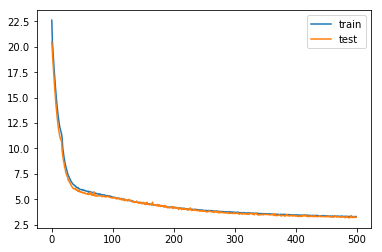

In [21]:
from keras.layers import Dropout

def buildManyToOneModel(shape):
    model = Sequential()
    model.add(LSTM(64,input_length=shape[1], input_dim=shape[2],return_sequences=True))
    model.add(Activation('relu'))
    model.add(Dropout(0.3))
    model.add(LSTM(128))
    model.add(Activation('relu'))
    model.add(Dropout(0.3))
    model.add(Dense(7))
    model.add(Activation('linear'))
    model.compile(loss="mae", optimizer='RMSprop')
    model.summary()
    return model

model = buildManyToOneModel(X_train.shape)

history=model.fit(X_train, Y_train, epochs=500, batch_size=300, validation_split= 0.1)
# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

#儲存model
model.save('Dalitcmodel.h5')
del model

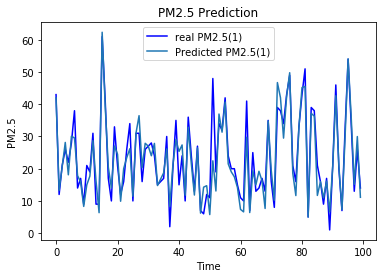

Train 0.6001003512293026
Validation 0.5
2.1130081554334238e+40
The R2 score on the Test set is:	0.888
Train Score: 4.08 RMSE
Test Score: 4.77 RMSE
The MSE   on the Test set is: 22.762972508963646
The RMSE  on the Test set is: 4.771055701725106
The MAE   on the Test set is: 3.220948175647377
The MAPE  on the Test set is: inf
The SMAPE on the Test set is: 0.026066656570696917


/home/gh555657/.local/lib/python3.5/site-packages/ipykernel_launcher.py:34: RuntimeWarning: divide by zero encountered in true_divide


In [22]:
#讀取model
model = load_model('Dalitcmodel.h5')
# 預測
trainPredict = model.predict(X_train)
testPredict = model.predict(X_val)

plt.plot(Y_val[0:100,0], color = 'blue', label = 'real PM2.5(1)')
#plt.plot(testPredict[0:10], color = 'red', label = 'Predicted PM2.5')
plt.plot(testPredict[0:100,0], label = 'Predicted PM2.5(1)')
plt.title('PM2.5 Prediction')
plt.xlabel('Time')
plt.ylabel('PM2.5')
plt.legend()
plt.show()

print('Train',np.sum(np.abs(np.exp(trainPredict)-np.exp(Y_train))/np.exp(Y_train)<0.25)/Y_train.shape[0])

print('Validation',np.sum(np.abs(np.exp(testPredict)-np.exp(Y_val))/np.exp(Y_val)<0.25)/Y_val.shape[0])

print(np.sqrt(mean_squared_error(np.exp(Y_val),np.exp(testPredict))))

print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(Y_val, testPredict)))
r2_train = r2_score(Y_val,testPredict)

# calculate 均方根誤差(root mean squared error)
trainScore = math.sqrt(mean_squared_error(Y_train, trainPredict))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(Y_val, testPredict))
print('Test Score: %.2f RMSE' % (testScore))

# MAPE和SMAPE
def mape(y_true, y_pred): 
    n = len(y_true)
    return np.mean(np.abs((y_pred - y_true) / y_true))/n *100 

def smape(y_true, y_pred):
    n = len(y_true)
    return 2.0 * np.mean(np.abs(y_pred - y_true) / (np.abs(y_pred) + np.abs(y_true)))/n *100

# MSE
print("The MSE   on the Test set is:",metrics.mean_squared_error(Y_val, testPredict)) # 範圍(0,+∞) 越小越好
# RMSE
print("The RMSE  on the Test set is:",np.sqrt(metrics.mean_squared_error(Y_val, testPredict))) # 範圍(0,+∞) 越小越好
# MAE
print("The MAE   on the Test set is:",metrics.mean_absolute_error(Y_val, testPredict)) # 範圍(0,+∞) 越小越好 數據有0時不可用
# MAPE
print("The MAPE  on the Test set is:",mape(Y_val, testPredict)) # 範圍(0,+∞) 越小越好 數據有0時不可用
# SMAPE
print("The SMAPE on the Test set is:",smape(Y_val, testPredict)) # 範圍(0,+∞) 越小越好 數據有0時不可用



In [23]:
model.predict(X_val)

array([[42.00394 , 42.46034 , 42.76861 , ..., 42.359432, 42.151684,
        42.246178],
       [13.264317, 13.27265 , 13.387407, ..., 13.78561 , 13.738478,
        13.663984],
       [20.664585, 20.10896 , 19.924759, ..., 21.21123 , 22.618414,
        23.920998],
       ...,
       [19.899462, 20.745314, 21.12971 , ..., 19.702744, 18.44172 ,
        17.70078 ],
       [36.119717, 39.569878, 41.589928, ..., 38.658447, 34.84952 ,
        32.03914 ],
       [12.461289, 13.492094, 14.167004, ..., 13.48786 , 12.448843,
        11.956032]], dtype=float32)